------
### Metis: Project Fletcher 
>  Neha Gupta                
>  Date: 3/1/2019
-------

### Import Libraries

In [82]:
import pandas as pd
import os
import re
import pprint
import nltk
nltk.data.path.append("/Users/admin/nltk_data/corpora/words")
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer 
import warnings
warnings.filterwarnings("ignore")
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

import itertools
from collections import Counter
from collections import defaultdict

import json
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

import seaborn as sns
import pickle

#### Download words from nltk

In [2]:
# nltk.download('words')

#### Import data in dataframe

In [3]:
df_airbnb = pd.read_csv("./airbnb28.csv")
df_airbnb = df_airbnb.drop(df_airbnb.columns[0], axis=1)
# print("Dataset has {} rows, {} columns.".format(*df_airbnb.shape))

In [4]:
# df_airbnb = pd.read_pickle("./df_airbnb_cleaned.pkl")

In [5]:
# print("Dataset has {} rows, {} columns.".format(*df_airbnb.shape))

__Check data in dataframe__

In [6]:
# df_airbnb.head(2)

In [7]:
# df_airbnb.describe()

__Make a new dataframe of 'decription' feature__

In [8]:
corpus_description = df_airbnb['description'].astype(str)

In [9]:
# corpus_description.head()

In [10]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")

count_vectorizer.fit(corpus_description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
doc_word = count_vectorizer.transform(corpus_description)

In [12]:
# pd.DataFrame(doc_word.toarray())

## Text Pre-processing

_Creating a function to pre-process text_

In [13]:
def preprocess_text(corpus):
    """Takes a corpus in list format and applies basic preprocessing steps of word tokenization,
     removing of english stop words, lower case and lemmatization."""
    processed_corpus = []
    english_words = set(nltk.corpus.words.words())
    english_stopwords = set(stopwords.words('english'))
    english_stopwords.update(['san', 'francisco','de','de_sac','one','din','like','cotton','non','able','meet','give','mostly','anything','always','zero','live','alone','available','build','need','build','great','live','full','square','house','two','away','area','size','access','mission','stay','place','check','also','beautiful','easy','unit','din','please','make'])  
    wordnet_lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[\w|!]+')
    for row in corpus:
        word_tokens = tokenizer.tokenize(row)
        word_tokens_lower = [t.lower() for t in word_tokens]
        word_tokens_lower_english = [t for t in word_tokens_lower if t in english_words]
        word_tokens_no_stops = [t for t in word_tokens_lower_english if not t in english_stopwords]
        
        word_tokens_no_stops_lemmatized = []
        for t in word_tokens_no_stops:
            lemma_v= wordnet_lemmatizer.lemmatize(t,pos='v')
            lemma_n = lemma= wordnet_lemmatizer.lemmatize(t)
            if t!=lemma_v:
                word_tokens_no_stops_lemmatized.append(lemma_v)
            else:
                word_tokens_no_stops_lemmatized.append(lemma_n)
        word_tokens_no_stops_lemmatized_rm_sigleword = [t for t in word_tokens_no_stops_lemmatized if len(t)>1]
        processed_corpus.append(word_tokens_no_stops_lemmatized_rm_sigleword)
    return processed_corpus    


In [14]:
final_processed_decription = preprocess_text(corpus_description)

In [15]:
# with open('final_processed_data.pkl', 'wb') as f:
#     pickle.dump(final_processed_decription, f)

__Checking word counts in decsending order__

In [16]:
# result = defaultdict(int)
# for i in final_processed_decription:
#     for j in i:
#         result[j]+=1

# sorted_by_value = sorted(result.items(), key=lambda kv: kv[1],reverse = True)

In [17]:
# sorted_by_value

### Document-Term Matrix

In [18]:
dictionary = Dictionary(final_processed_decription)
# Convert corpus into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(listing) for listing in final_processed_decription]

In [19]:
# doc_term_matrix

In [20]:
# for keys,values in dictionary.items():
#     print(keys,values)
# #     print(values)


### LDA Model

In [21]:
LDA = LdaModel
# load corpus iterator
# mm = MmCorpus('wiki_en_tfidf.mm')
ldamodel = LDA(doc_term_matrix, num_topics=3, id2word = dictionary,passes=10,minimum_probability=0.001,random_state=0)            
               
               

__Print Topics__

In [22]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.016*"kitchen" + 0.016*"home" + 0.016*"bedroom" + 0.015*"room" + 0.013*"apartment" + 0.013*"live" + 0.011*"large" + 0.011*"modern" + 0.010*"city" + 0.010*"build"


Topic: 1 
Words: 0.039*"room" + 0.028*"private" + 0.024*"bed" + 0.018*"bathroom" + 0.018*"bedroom" + 0.014*"kitchen" + 0.013*"queen" + 0.013*"live" + 0.012*"space" + 0.010*"floor"


Topic: 2 
Words: 0.032*"park" + 0.030*"walk" + 0.020*"street" + 0.015*"neighborhood" + 0.015*"gate" + 0.014*"golden" + 0.013*"downtown" + 0.013*"close" + 0.012*"apartment" + 0.010*"bus"




__Providing Topic Name__

In [23]:
docTopicProbMat = ldamodel[doc_term_matrix]
l_topics = ['room_details', 'neighborhood_details', 'house_details']
docTopicProbDf = pd.DataFrame(index=df_airbnb.index, columns=l_topics)
for i, doc in enumerate(docTopicProbMat):
    for topic in doc:
        docTopicProbDf.iloc[i, topic[0]] = topic[1]

In [24]:
# docTopicProbDf.idxmax(axis=1)
# df_topics = docTopicProbDf['topics']
# Merge with df
df_with_topics = pd.concat([df_airbnb, docTopicProbDf], axis=1)

In [25]:
df_with_topics.shape

(25125, 18)

### LDA with Gensim : This modeling is providing good topics
__Creating Bigram and Trigram Models__

In [28]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(final_processed_decription, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[final_processed_decription], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[final_processed_decription[0]]])




__Here output is showing (word_id, word_frequency) in document__

In [29]:
# Create Dictionary
id2word = corpora.Dictionary(final_processed_decription)

# Create Corpus
texts = final_processed_decription

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 1), (15, 2), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1)]]


In [30]:
# Readable format of corpus (term-frequency)
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [31]:
### Building the Topic Model

In [32]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [36]:
# Print the Keyword in the 10 topics
# print(lda_model.print_topics())
# doc_lda = lda_model[corpus]
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.015*"home" + 0.014*"city" + 0.013*"build" + 0.010*"room" + 0.010*"enjoy" + 0.010*"hill" + 0.010*"heart" + 0.009*"apartment" + 0.008*"modern" + 0.008*"center"


Topic: 1 
Words: 0.039*"park" + 0.034*"walk" + 0.025*"street" + 0.019*"neighborhood" + 0.018*"gate" + 0.017*"downtown" + 0.017*"golden" + 0.016*"close" + 0.013*"public" + 0.012*"block"


Topic: 2 
Words: 0.038*"room" + 0.025*"private" + 0.023*"kitchen" + 0.022*"bed" + 0.022*"bedroom" + 0.018*"live" + 0.017*"bathroom" + 0.013*"queen" + 0.013*"home" + 0.012*"large"




__Compute Model Perplexity and Coherence Score__

In [37]:
#Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=final_processed_decription, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -6.524890028905471

Coherence Score:  0.4099947870542635


### LSA Model

In [38]:
lsa_vectorizer = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False)

__Dimensionality Reduction__
__Once we have document-term matrix, we can start thinking about our latent topics. Here’s the thing: in all likelihood, A is very sparse, very noisy, and very redundant across its many dimensions. As a result, to find the few latent topics that capture the relationships among the words and documents, we want to perform dimensionality reduction on matrix.__

__Truncated SVD__

In [39]:
# pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

In [40]:
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=3,      
                         algorithm='randomized',
                         n_iter=100,random_state=42)

In [41]:
from sklearn.pipeline import Pipeline
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', lsa_vectorizer), 
                            ('svd', svd_model)])

In [42]:
svd_matrix = svd_transformer.fit_transform(final_processed_decription)

In [43]:
len(svd_model.components_)

3

In [44]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [45]:
dfmap = df_with_topics[['room_details','neighborhood_details','house_details']].copy()
new_col = 'topic_descriptions'
docTopicProbMat = ldamodel[doc_term_matrix]
# cols = ['room_details','neighborhood','house_details']
docTopicProbDf1 = pd.DataFrame(index=dfmap.index, columns=range(3))
for i, doc in enumerate(docTopicProbMat):
    for topic in doc:
        docTopicProbDf1.iloc[i, topic[0]] = topic[1]
docTopicProbDf1[new_col] = docTopicProbDf1.astype(float).idxmax(axis=1)

In [46]:
df_topics1 = docTopicProbDf1[new_col]
# Merge with df
df_topics1.values

array([1, 0, 0, ..., 1, 1, 1])

In [47]:
# import umap

# embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(svd_matrix)
# plt.figure(figsize=(7,5))
# plt.scatter(embedding[:, 0], embedding[:, 1], 
# c = df_topics1.values,
# label = df_topics1.values,
# s = 10, # size
# edgecolor='none'
# )
# plt.colorbar()

# unique_classes = list(['room_type', 'home_type', 'neighborhood'])
# plt.table(cellText=[[x] for x in [0,1,2]], loc='lower right',
#           colWidths=[0.2],rowColours=cmap(np.array(unique_classes)-1),
#          rowLabels=['label%d'%x for x in unique_classes],
#           colLabels=['classes'])
# plt.show()

In [48]:
terms = lsa_vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    terms =  []
    for t in sorted_terms:
        terms.append(t[0])
    print("Topic "+str(i)+": " + ' ,  '.join(terms))

Topic 0: room ,  private ,  bedroom ,  park ,  kitchen ,  bed ,  home
Topic 1: park ,  bedroom ,  home ,  room ,  kitchen ,  private ,  bed
Topic 2: kitchen ,  private ,  home ,  park ,  bed ,  bedroom ,  room


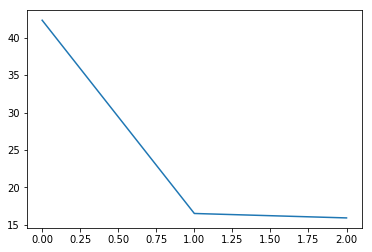

In [47]:
import matplotlib.pyplot as plt
plt.plot(svd_model.singular_values_[0:10])
plt.show()

### NMF Model

In [49]:
no_features = 1000

tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False)
tfidf = tfidf_vectorizer.fit_transform(final_processed_decription)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [50]:
from sklearn.decomposition import NMF
no_topics = 3
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [51]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d: " % (topic_idx)+" , ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0: room , private , bedroom , bed , live , kitchen , bathroom , home , large , queen
Topic 1: park , walk , gate , golden , street , apartment , bus , downtown , beach , close
Topic 2: registration , term , rental , short , certificate , ordinance , code , residential , number , possession


### K Clustring

In [52]:
from sklearn.cluster import KMeans
true_k = 3
vectorizer = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False)
cluster = vectorizer.fit_transform(final_processed_decription)
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
model.fit(cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    top_terms = []
    for ind in order_centroids[i, :10]:
        top_terms.append(terms[ind])
    print("Cluster %d:" % i + ' , '.join(top_terms) )

Top terms per cluster:
Cluster 0:park , walk , apartment , street , neighborhood , home , city , gate , golden , close
Cluster 1:room , bedroom , live , kitchen , bed , private , bathroom , home , large , floor
Cluster 2:private , entrance , studio , suite , garden , bed , park , bathroom , space , microwave


In [54]:
clusters = model.labels_.tolist()
frame = pd.DataFrame(clusters, columns=['clusters'])
frame['clusters'].value_counts()

0    11127
1     9295
2     4703
Name: clusters, dtype: int64

In [60]:
df_with_some_features=df_with_topics[['accommodates','bathrooms','bedrooms','beds','guests_included','extra_people','minimum_nights','yield','room_type','property_type','bed_type', 'room_details', 'neighborhood_details', 'house_details' ]].copy()





In [61]:
df_with_some_features.shape

(25125, 14)

__Feature selection__

In [62]:
print("Dataset has {} rows, {} columns.".format(*df_with_some_features.shape))

Dataset has 25125 rows, 14 columns.


In [63]:
categorical_feats = ['property_type', 'room_type', 'bed_type']
df_with_some_features_and_category = pd.get_dummies(df_with_some_features, columns=categorical_feats, drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df_with_some_features_and_category.shape))
df_with_some_features_and_category.head()

Dataset has 25125 rows, 22 columns.


,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,yield,room_details,neighborhood_details,...,property_type_Bed & Breakfast,property_type_Boutique hotel,property_type_Condominium,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Non-Real Bed,bed_type_Real Bed
0,3.0,1.0,1.0,2.0,2.0,25.0,1.0,39693.6,0.298948,0.694962,...,0,0,0,0,0,1,0,0,0,1
1,5.0,1.5,2.0,2.0,2.0,150.0,7.0,21340.8,0.729041,0.00609895,...,0,0,0,1,0,1,0,0,0,1
2,6.0,1.0,2.0,3.0,1.0,0.0,2.0,10180.8,0.57053,0.424268,...,0,0,0,0,0,1,0,0,0,1
3,3.0,1.0,1.0,2.0,2.0,60.0,1.0,94644.0,0.00585081,0.920003,...,0,0,1,0,0,0,1,0,0,1
4,3.0,1.0,1.0,2.0,2.0,35.0,3.0,24300.0,0.988086,0.00634775,...,0,0,0,0,0,1,0,0,0,1


In [64]:
df_airbnb.head(2).iloc[0, 0]

"Our bright garden unit overlooks a grassy backyard area with fruit trees and native plants. It is an oasis in a big city. The apartment comfortably fits a couple or small family. It is located on a cul de sac street that ends at lovely Duboce Park. Newly remodeled, modern, and bright garden unit in historic Victorian home.  *New fixtures and finishes. *Organic cotton sheets and towels. *Zero VOC and non-toxic Yolo paint. *Organic and fair-trade teas, fresh local ground coffee. *Local art on walls. *Sofa bed and Queen bed are in the same room. More of a petite apartment with a separate room for dining and kitchen. *Full access to patio and backyard (shared with us and our dog who live upstairs) *Beautiful garden with fruit trees, native plants and lawn *Washer and dryer *Children's toys *Charcoal grill A family of 4 lives upstairs with their dog. Normally we are able to meet guests, but we like to give people their privacy and mostly leave them alone. We are always available if anythin

__Random forest model__

In [88]:
%%time
rf_reg_model = RandomForestRegressor(random_state=seed, bootstrap=True, criterion='mse', max_depth=10, 
                           max_features='auto', min_samples_split=4, n_estimators=150)

rf_reg_model.fit(X_train, y_train)

CPU times: user 7.9 s, sys: 4 ms, total: 7.91 s
Wall time: 7.9 s


In [89]:
# Make prediction
rf_reg_modely_pred = rf_reg_model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rf_reg_modely_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, rf_reg_modely_pred))


from joblib import dump, load
dump(rf_reg_model, 'rf_reg_model.joblib')

Mean squared error: 3142237190.37
Variance score: 0.30


['rf_reg_model.joblib']

### Training models with topic df

In [91]:
df_with_some_features_and_category[['room_details','neighborhood_details','house_details']]=df_with_topics[['room_details','neighborhood_details','house_details']].copy()




In [92]:
# df_with_three_topics.shape
print("Dataset has {} rows, {} columns.".format(*df_with_some_features_and_category.shape))

Dataset has 25125 rows, 22 columns.


In [93]:
df_with_some_features_and_category.head(2)

,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,yield,room_details,neighborhood_details,...,property_type_Bed & Breakfast,property_type_Boutique hotel,property_type_Condominium,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Non-Real Bed,bed_type_Real Bed
0,3.0,1.0,1.0,2.0,2.0,25.0,1.0,39693.6,0.298948,0.694962,...,0,0,0,0,0,1,0,0,0,1
1,5.0,1.5,2.0,2.0,2.0,150.0,7.0,21340.8,0.729041,0.00609895,...,0,0,0,1,0,1,0,0,0,1


In [94]:
new_col = 'topic_descriptions'
docTopicProbMat = ldamodel[doc_term_matrix]
cols = ['room_details','neighborhood','house_details']
docTopicProbDf = pd.DataFrame(index=df_with_some_features_and_category.index, columns=cols)
for i, doc in enumerate(docTopicProbMat):
    for topic in doc:
        docTopicProbDf.iloc[i, topic[0]] = topic[1]
docTopicProbDf[new_col] = docTopicProbDf.astype(float).idxmax(axis=1)
df_topics = docTopicProbDf[new_col]
# Merge with df
df_with_topic_desc = pd.concat([df_with_some_features_and_category, df_topics], axis=1)

In [95]:
docTopicProbMat[0]

[(0, 0.2989563), (1, 0.6949561), (2, 0.006087613)]

In [96]:
docTopicProbDf.head()

,room_details,neighborhood,house_details,topic_descriptions
0,0.298951,0.694955,0.00609373,neighborhood
1,0.729036,0.00609835,0.264865,room_details
2,0.57053,0.424268,0.00520217,room_details
3,0.00585211,0.919988,0.0741602,neighborhood
4,0.988085,0.00634855,0.00556647,room_details


In [97]:
df_with_topic_desc.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,yield,room_details,neighborhood_details,...,property_type_Boutique hotel,property_type_Condominium,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Non-Real Bed,bed_type_Real Bed,topic_descriptions
0,3.0,1.0,1.0,2.0,2.0,25.0,1.0,39693.6,0.298948,0.694962,...,0,0,0,0,1,0,0,0,1,neighborhood
1,5.0,1.5,2.0,2.0,2.0,150.0,7.0,21340.8,0.729041,0.00609895,...,0,0,1,0,1,0,0,0,1,room_details
2,6.0,1.0,2.0,3.0,1.0,0.0,2.0,10180.8,0.57053,0.424268,...,0,0,0,0,1,0,0,0,1,room_details
3,3.0,1.0,1.0,2.0,2.0,60.0,1.0,94644.0,0.00585081,0.920003,...,0,1,0,0,0,1,0,0,1,neighborhood
4,3.0,1.0,1.0,2.0,2.0,35.0,3.0,24300.0,0.988086,0.00634775,...,0,0,0,0,1,0,0,0,1,room_details


In [115]:
df_with_topic_desc_as_category = pd.get_dummies(df_with_topic_desc, columns=[new_col], drop_first=False)

In [116]:
# Create response and target variable
X = df_with_some_features_and_category.drop(target, axis=1)
y = df_with_some_features_and_category[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Liner Regression Model

In [117]:
rf_reg_model.fit(X_train, y_train)
# Make prediction
rf_reg_modely_pred = rf_reg_model.predict(X_test)


print("RMSE Score: %.5f" %np.sqrt(metrics.mean_squared_error(y_test,rf_reg_modely_pred)))
print('Variance score: %.2f' % r2_score(y_test, rf_reg_modely_pred))

RMSE Score: 53167.27030
Variance score: 0.33


### Decision Tree Model

In [119]:
# Fit Decision Tree Regression model
dt_reg_model = DecisionTreeRegressor(random_state = seed,max_depth = 5)
dt_reg_model.fit(X_train,y_train)
dt_reg_y_pred = dt_reg_model.predict(X_test)

print("RMSE Score: %.5f" %np.sqrt(metrics.mean_squared_error(y_test,dt_reg_y_pred)))
print("Variance Score: %.2f" %r2_score(y_test,dt_reg_y_pred))

RMSE Score: 58631.09619
Variance Score: 0.18


### Random Forest Model

In [125]:
#Tuning the model
param_grid = { "n_estimators"      : [175, 200],
           "criterion"         : ['mse'],
           "max_features"      : ['auto'], #auto, sqrt, log2, int/n_feature
           "max_depth"         : [10,20],
           "min_samples_split" : [5,10] ,
           "bootstrap": [True]}

In [126]:
%%time
rf = RandomForestRegressor(random_state=seed)
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)


CPU times: user 8min 28s, sys: 80 ms, total: 8min 28s
Wall time: 8min 4s


In [129]:
# Make prediction
rf_y_pred = rf_cv.predict(X_test)

print("RMSE Score: %.5f" %np.sqrt(metrics.mean_squared_error(y_test,rf_y_pred)))
print("Variance Score: %.2f" %r2_score(y_test,rf_y_pred))


RMSE Score: 47070.98550
Variance Score: 0.47


In [109]:
# Change variables
random_state = 59

X = df_with_some_features_and_category.drop(target, axis=1)
y = df_with_some_features_and_category[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fit and make prediction
rf_reg_model.fit(X_train, y_train)
rf_reg_modely_pred = rf_reg_model.predict(X_test)

print("RMSE Score: %.5f" %np.sqrt(metrics.mean_squared_error(y_test,rf_reg_modely_pred)))
print("Variance Score: %.2f" %r2_score(y_test,rf_reg_modely_pred))

Mean squared error: 3142237190.37
Variance score: 0.30


In [ ]:
#Display feature importance
def feature_importance(model, trainData, display_n_rows):
    """Display feature importance & weighting for tree based model"""
    fi = model.feature_importances_*100
    feat_imp = pd.DataFrame(list(zip(fi,trainData.columns.values)))
    feat_imp = feat_imp.sort_values(by=0, axis=0, ascending=False)
    feat_imp.columns = ['importance %', 'feature']
    print(feat_imp[:display_n_rows])

In [ ]:
#Display features & weighting
rf_best = rf_cv.best_estimator_
feature_importance(rf_best, X_train, 20)

In [49]:
average_price_frequency_reviews_topics = df_with_topic_desc_as_category[['topic_descriptions_house_details','topic_descriptions_neighborhood','topic_descriptions_room_details']].copy()

In [50]:
average_price_frequency_reviews_topics.head()


,topic_descriptions_house_details,topic_descriptions_neighborhood,topic_descriptions_room_details
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [51]:
nlp_feats = ['topic_descriptions_house_details','topic_descriptions_neighborhood','topic_descriptions_room_details']
average_price_frequency_reviews_topics['topics_description'] = average_price_frequency_reviews_topics[nlp_feats].idxmax(axis=1)
average_price_frequency_reviews_topics['topics_description'] = average_price_frequency_reviews_topics['topics_description'].str.replace('topic_descriptions_', '')

In [52]:
average_price_frequency_reviews_topics.head(4)

,topic_descriptions_house_details,topic_descriptions_neighborhood,topic_descriptions_room_details,topics_description
0,0,1,0,neighborhood
1,0,0,1,room_details
2,0,0,1,room_details
3,0,1,0,neighborhood


In [53]:
average_price_frequency_reviews_topics= pd.concat([average_price_frequency_reviews_topics, df_airbnb[['price','reviews_per_month','yield']]], axis=1)
# average_price_frequency_reviews_topics=df_airbnb[['price','reviews_per_month']].copy()

In [54]:
average_price_frequency_reviews_topics.head()

,topic_descriptions_house_details,topic_descriptions_neighborhood,topic_descriptions_room_details,topics_description,price,reviews_per_month,yield
0,0,1,0,neighborhood,370.0,1.49,39693.6
1,0,0,1,room_details,1235.0,0.24,21340.8
2,0,0,1,room_details,505.0,0.28,10180.8
3,0,1,0,neighborhood,239.0,5.50,94644.0
4,0,0,1,room_details,375.0,0.90,24300.0


In [55]:
df3 = average_price_frequency_reviews_topics[['topics_description', 'price', 'reviews_per_month']].groupby(['topics_description']).mean()
df3['count'] = average_price_frequency_reviews_topics[['yield', 'topics_description']].groupby(['topics_description']).count()['yield']
df3['reviews_per_year'] = df3['reviews_per_month']*12
df3['color'] = ['R', 'G', 'B']

In [56]:
df3

,price,reviews_per_month,count,reviews_per_year,color
topics_description,,,,,
house_details,347.010724,2.434127,8486,29.209522,R
neighborhood,276.755905,3.225547,9103,38.706558,G
room_details,461.187633,1.892236,7536,22.706831,B


In [ ]:
plt.figure(figsize=(10, 6))



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Unique category labels:
color_labels = df3['color'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", 8)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(df3['reviews_per_year'], df3['price'], c=df3['color'].map(color_map), s=df3['count']*.2)

# plt.ylim([120,180])
# plt.xlim([16,24])

plt.xlabel('Avg. no. of reviews / year',fontsize=20)
plt.ylabel('Avg. price / night($)', fontsize=20)
plt.title('Average price and frequency of reviews by description topic', weight='bold', fontsize=14)

for i, txt in enumerate(df3.index):
    plt.annotate(txt, (df3['reviews_per_year'].iat[i]-0.3,df3['price'].iat[i]), fontsize=11, weight='bold')
plt.savefig("results.png")

In [ ]:
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

In [ ]:
# # %%time
#p = pyLDAvis.gensim.prepare(ldamodel_description, doc_term_matrix_description, dictionary_description)

In [ ]:
pyLDAvis.save_html(p, 'lda.html')